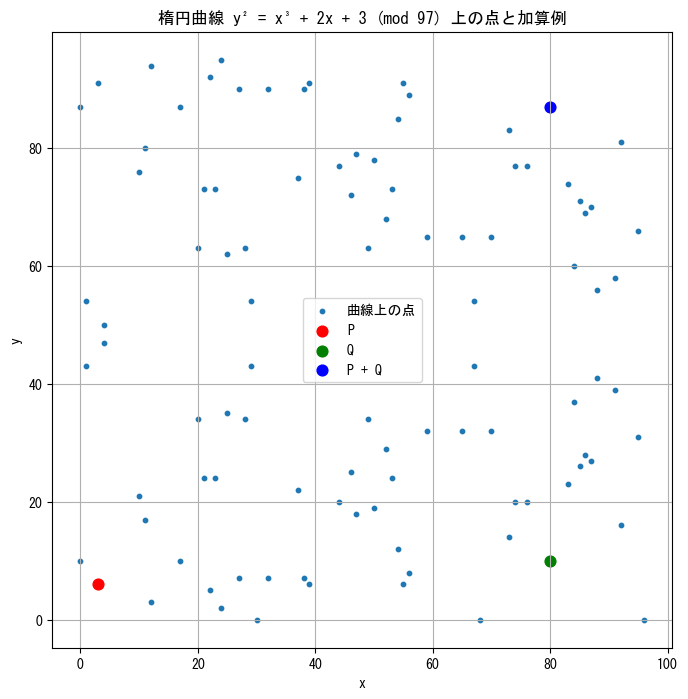

In [5]:
import matplotlib.pyplot as plt

# フォントを日本語対応に設定（Windowsなら 'MS Gothic'）
plt.rcParams['font.family'] = 'MS Gothic'

# 楕円曲線 y^2 = x^3 + ax + b (mod p)
class EllipticCurve:
    def __init__(self, a, b, p):
        self.a = a
        self.b = b
        self.p = p

    def is_on_curve(self, x, y):
        return (y ** 2 - (x ** 3 + self.a * x + self.b)) % self.p == 0

    def infinity(self):
        return (None, None)

# 点の加算を行う関数（簡易バージョン）
def point_add(P, Q, curve):
    p = curve.p
    if P == Q:
        if P[1] == 0:
            return curve.infinity()
        lam = ((3 * P[0]**2 + curve.a) * pow(2 * P[1], -1, p)) % p
    else:
        if P[0] == Q[0] and (P[1] + Q[1]) % p == 0:
            return curve.infinity()
        lam = ((Q[1] - P[1]) * pow(Q[0] - P[0], -1, p)) % p

    x_r = (lam**2 - P[0] - Q[0]) % p
    y_r = (lam * (P[0] - x_r) - P[1]) % p
    return (x_r, y_r)

# 曲線と点の定義
a, b, p = 2, 3, 97
curve = EllipticCurve(a, b, p)
P = (3, 6)
Q = (80, 10)
R = point_add(P, Q, curve)

# 曲線上のすべての点を取得
points = [(x, y) for x in range(p) for y in range(p) if curve.is_on_curve(x, y)]

# 全体プロット
x_vals, y_vals = zip(*points)
plt.figure(figsize=(8, 8))
plt.scatter(x_vals, y_vals, s=10, label="曲線上の点")

# 特定の点をハイライト
plt.scatter(*P, color='red', label="P", s=60)
plt.scatter(*Q, color='green', label="Q", s=60)
if R != (None, None):
    plt.scatter(*R, color='blue', label="P + Q", s=60)

# 描画設定
plt.title(f"楕円曲線 y² = x³ + {a}x + {b} (mod {p}) 上の点と加算例")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.legend()
plt.show()
